# Google Colab Lab Assignment - LSTM

**Course Name:** Deep Learning

**Lab Title:** LSTM Time Series Forcasting

**Student Name:** Rohan Agrawal

**Student ID:** 202201040208

**Date of Submission:** 19-04-2025



**Objective**
The objective of this assignment is to explore the capabilities of Long Short-Term Memory (LSTM) networks in solving different types of sequential data problems. Specifically, the assignment focuses on:

1. Time Series Forecasting: Predicting future values of univariate time series data using LSTM models to understand trends and patterns.

2. Sequence Text Prediction: Generating coherent text sequences (characters or words) by learning language patterns from large corpora using LSTM-based generative models.

3. Text Classification: Classifying text sequences (e.g., sentiment analysis, spam detection) using LSTM to capture contextual relationships in sequential data for accurate predictions.

# **Assignment Instructions:**

# **Experiment 5.1:**
**Objective:**

To forecast future values of a univariate time series using LSTM-based models.

**Suggested Datasets:**

Daily Minimum Temperatures – Melbourne

COVID-19 Daily Cases – Our World in Data

Airline Passengers Dataset

Electricity Consumption Dataset

Stock Prices Dataset (e.g., Tesla)

Weather Data – Seattle or London

Sunspot Activity Dataset

Energy Usage – PJM Hourly Energy Consumption

Bitcoin Price Time Series

Retail Sales Forecasting – Walmart Dataset

**Expected Outcome:**

Prediction vs actual plot

RMSE/MAE values

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - loss: 0.1061 - val_loss: 0.3513
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0678 - val_loss: 0.2522
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0528 - val_loss: 0.1677
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0310 - val_loss: 0.1016
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0184 - val_loss: 0.0566
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - val_loss: 0.0357
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - val_loss: 0.0316
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0146 - val_loss: 0.0329
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - val_loss: 0.0383
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - val_loss: 0.0445
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0115 - val_loss: 0.0467
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - val_loss: 0.0462
Epoch 13/50

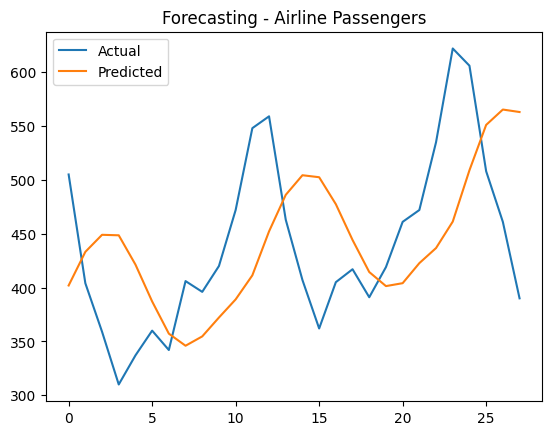

RMSE: 88.89, MAE: 76.69


In [ ]:
# Dataset : Airline Passenger Dataset
# Experiment 5.1: Time Series Forecasting using LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Load Dataset
url = '/content/AirPassengers.csv'
df = pd.read_csv(url, usecols=[1])
df.columns = ['Passengers']
data = df.values.astype('float32')

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Sequence preparation
def create_dataset(dataset, step=1):
    X, y = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        X.append(a)
        y.append(dataset[i + step, 0])
    return np.array(X), np.array(y)

look_back = 5
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train/Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Predict & Invert
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Forecasting - Airline Passengers")
plt.legend()
plt.show()

# Evaluation
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


# **Experiment 5.2:**
Sequence Text Prediction using LSTM

**Objective:**

To generate next characters/words based on a given input sequence using LSTM.

**Suggested Datasets (Min 10):**

Shakespeare’s Text (TensorFlow Datasets)

Pride and Prejudice – Jane Austen (Project Gutenberg)

Harry Potter Books Dataset

Movie Dialogue Dataset (Cornell)

Reddit Jokes Dataset

Lyrics Dataset (e.g., Taylor Swift or Beatles)

Wikipedia Articles Dump

News Headline Dataset

Quora Questions Pairs

English Proverbs Dataset

**Expected Outcome:**

Auto-generated text samples

Training accuracy/loss plots

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - loss: 3.2540
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - loss: 2.0160
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 30s 184ms/step - loss: 1.6431
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - loss: 1.4733
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - loss: 1.3725
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 1.3044
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 1.2452
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 1.1882
Epoch 9/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - loss: 1.1349
Epoch 10/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - loss: 1.0761
Epoch 11/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 185ms/step - loss: 1.0166
Epoch 12/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 189ms/step - loss: 0.9483
Epoch 13/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - loss: 0.8761
Epoch 14/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - loss: 0.7974
Epoch 15/30
155

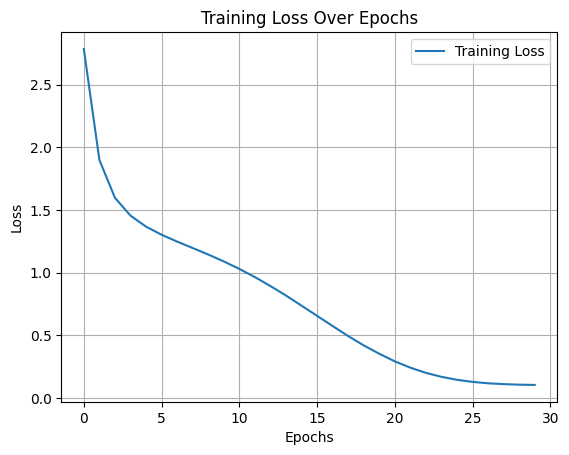

In [ ]:
# Dataset: Shakesphere

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load dataset (no as_supervised=True)
data = tfds.load('tiny_shakespeare', split='train')
text_data = ''
for example in data:
    text_data += example['text'].numpy().decode('utf-8')

# Preprocessing
vocab = sorted(set(text_data))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text_data])

# Sequence preparation
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_seq = chunk[:-1]
    target_seq = chunk[1:]
    return input_seq, target_seq

dataset = sequences.map(split_input_target)
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Model architecture
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units):
    return tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])

model = build_model(vocab_size, embedding_dim, rnn_units)

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Add checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/model_checkpoint.weights.h5',
    save_weights_only=True,
    monitor='loss',
    save_best_only=True
)

# Train model
EPOCHS = 30
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Text generation function
def generate_text(model, start_string, gen_length=500, temperature=0.8):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for _ in range(gen_length):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

In [ ]:
# 8. Generate example text
generated = generate_text(model, start_string="Once upon a time ", temperature=0.6)
print("\nGenerated text:\n")
print(generated)


Generated text:

Once upon a time he tht arger here athe thinche t in d the onof he hea ad have athe ng ag in ht ther t
Townd t s the in cacis in theronche th wed me at, win he mared d she y ther t t t therer heat ave owithe wamais w te ave ano.
F t t'd w athe Ay the the wing he, athe ithe thare alould l he thathe l y w weno man houlllllis t he ins he t the t walles, y mere, t the med; tof o he thers the boure he the mang t t atheeay o d th hers in the teas,
As omas he yo the here:


T:


ARES:
Tos the t the there wige ar hers, 


# **Experiment 5.3:**

Sequence Text Classification using LSTM

**Objective:**

To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

**Suggested Datasets (Min 10):**

IMDb Movie Reviews (Sentiment)

SMS Spam Collection Dataset

Amazon Product Reviews

Yelp Reviews Dataset

Twitter Sentiment Analysis Dataset

Toxic Comment Classification Dataset

Sarcasm Detection Dataset (News Headlines)

BBC News Classification Dataset

Disaster Tweets Classification

Fake News Detection Dataset

**Expected Outcome:**

Classification metrics: accuracy, precision, F1-score

Confusion matrix visualization

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7088 - loss: 0.5371 - val_accuracy: 0.8502 - val_loss: 0.3540
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8994 - loss: 0.2611 - val_accuracy: 0.8613 - val_loss: 0.3237
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9348 - loss: 0.1760 - val_accuracy: 0.8534 - val_loss: 0.3393
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9560 - loss: 0.1261 - val_accuracy: 0.8623 - val_loss: 0.3922
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9679 - loss: 0.0932 - val_accuracy: 0.8600 - val_loss: 0.4303


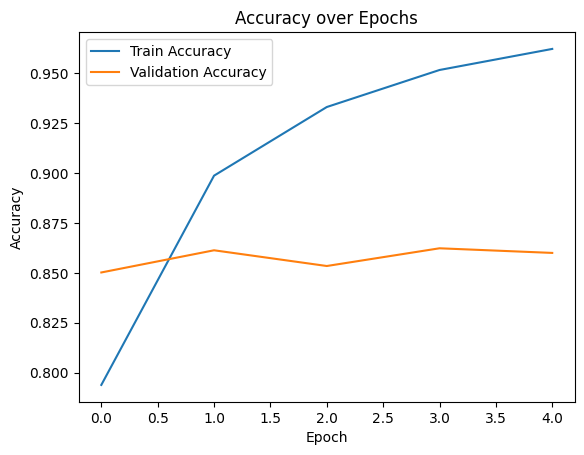

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

F1-score: 0.860044785668586


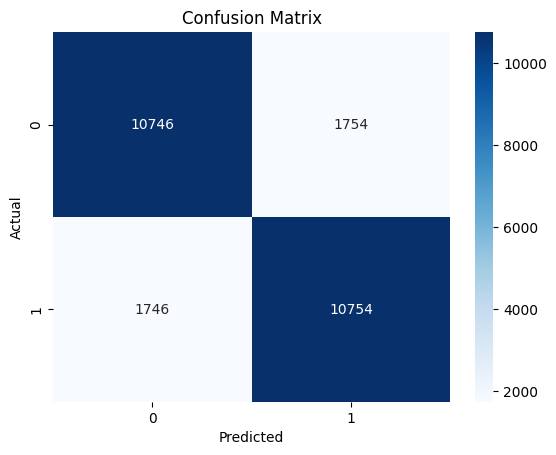

In [ ]:
# Dataset: IMDb Movie Reviews

# Experiment 5.3: Text Classification using LSTM

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Build model
model = Sequential([
    Embedding(10000, 128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [ ]:
# Test on custom review
print("\n🧪 Testing on custom reviews...")

# Load word index
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Encode review
def encode_review(text):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 2) for word in tokens]  # 2 = <UNK>
    return pad_sequences([encoded], maxlen=200)

# Try custom reviews
custom_reviews = [
    "The movie was absolutely wonderful and inspiring",
    "The plot was boring and the acting was terrible",
    "I really enjoyed the film, great acting and direction",
    "Worst movie ever, such a waste of time"
]

for review in custom_reviews:
    encoded = encode_review(review)
    prediction = model.predict(encoded)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment} ({prediction:.2f})")


🧪 Testing on custom reviews...
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Review: The movie was absolutely wonderful and inspiring
Predicted Sentiment: Negative (0.05)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Review: The plot was boring and the acting was terrible
Predicted Sentiment: Negative (0.32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Review: I really enjoyed the film, great acting and direction
Predicted Sentiment: Positive (0.82)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Review: Worst movie ever, such a waste of time
Predicted Sentiment: Negative (0.32)


✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion

Declaration

I, Rohan Agrawal, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [GitHub Link](https://github.com/Rohan452004/Deep-learning-IA)

Signature: Rohan Agrawal